In [60]:
train_path="images/TRAIN/"
train_path_2="images/TRAIN_2/"
valid_path="images/TEST_SIMPLE/"
results_path="images/"
model_path=""

In [2]:

#import modules

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline
print ("Library Loaded")

Library Loaded


In [3]:
%matplotlib inline
import utils; #reload(utils)
from utils import *
from __future__ import division, print_function
import pandas as pd
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np
import keras.utils.np_utils as kutils

Using Theano backend.


In [4]:
batch_size=100
epochs=20
import bcolz
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

In [16]:
def get_data_local(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL', 'EOSINOPHIL']:
                label = 'MONONUCLEAR'
            else:
                label = 'POLYNUCLEAR'
#            label=wbc_type
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    # Downsample the image to 120, 160, 3
                    img_file = scipy.misc.imresize(arr=img_file, size=(160,120, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [17]:
X_train, y_train = get_data_local(train_path)
X_test, y_test = get_data_local(valid_path)


In [18]:
np.unique(y_train)

encoder = LabelEncoder()
encoder.fit(y_train)


encoder1 = LabelEncoder()
encoder1.fit(y_test)

y_train = encoder.transform(y_train)
y_test = encoder1.transform(y_test)

In [19]:
y_train=np.array(y_train)
y_test=np.array(y_test)

y_train = onehot(y_train)
y_test = onehot(y_test)


print (y_train.shape)
print (y_test.shape)

(9957, 2)
(71, 2)


In [51]:
import numpy as np
print (np.unique(y_train))


[ 0.  1.]


In [53]:
y_test[0:5]

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [54]:
X_train.shape

(9957, 160, 120, 3)

In [70]:
y_train.shape

(9957, 2)

In [56]:
X_test.shape

(71, 160, 120, 3)

In [57]:
y_test.shape

(71, 2)

In [6]:


from keras import backend as K
K.set_image_dim_ordering('tf')

In [20]:

mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [60]:
def get_model_bn_do():
    model = Sequential([
        Lambda(norm_input, input_shape=(160, 120,3)),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        
            
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        
            
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        
            
#         Convolution2D(64,3,3, activation='relu'),
#         MaxPooling2D(),
        Flatten(),
#         BatchNormalization(),
            
        Dense(64, activation='relu'),
       
        Dropout(0.7),
        Dense(2, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [61]:
model=get_model_bn_do()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/ubuntu/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/ubuntu/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


In [ ]:
# gen = image.ImageDataGenerator()
# batches = gen.flow(trn_data, trn_labels, batch_size=64)
# val_batches = gen.flow(val_data, val_labels, batch_size=64)

In [64]:
# history = model.fit(
#     X_train,
#     y_train,
#     validation_split=0.2,
#     nb_epoch=epochs,
#     verbose=1,
#     shuffle=True,
#     batch_size=batch_size)

model.load_weights(model_path+'model1.h5')

In [18]:
X_test.shape

(71, 160, 120, 3)

In [65]:
pred=model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
df=pd.DataFrame(pred)
pred_ar=np.array(df.idxmax(axis=1))


df1=pd.DataFrame(y_test)
ori_ar=np.array(df.idxmax(axis=1))

In [68]:
print (accuracy_score(ori_ar,pred_ar))
print (confusion_matrix(ori_ar,pred_ar))

1.0
[[62  0]
 [ 0  9]]


In [32]:
# def plot_learning_curve(history):
#     plt.subplot(2,1,1)
#     plt.plot(history.history['acc'])
#     plt.plot(history.history['val_acc'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='lower right')
#     plt.savefig('./accuracy_curve.png')
    
#     # summarize history for loss
#     plt.subplot(2,1,2)
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper right')
#     plt.savefig('./loss_curve.png')

# plot_learning_curve(history)

# enquire on the Model Accuracy by Testing NEw Images

# Check the Complete Code and the Difference between your and his code.

#  Data Augmetation 

In [58]:
gen = image.ImageDataGenerator(rotation_range=20, width_shift_range=0.1, 
       height_shift_range=0.1,  shear_range=0.15, fill_mode='constant',
       vertical_flip=True, 
       horizontal_flip=True)



In [ ]:
img=np.expand_dims(ndimage.imread("images/TRAIN/NEUTROPHIL/_0_1986.jpeg"),0)

In [9]:
aug=gen.flow(img)

In [10]:
aug_imgs = [next(aug)[0].astype(np.uint8) for i in range(8)]

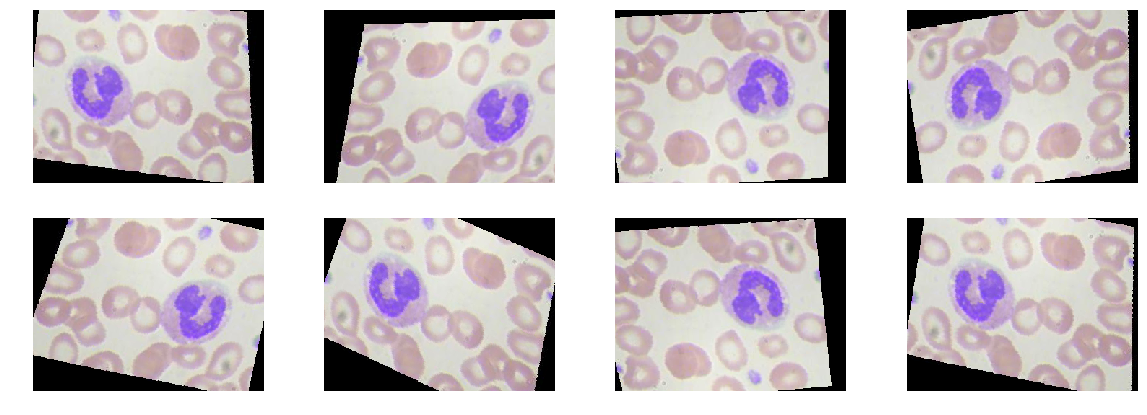

In [11]:

plots(aug_imgs, (20,7), 2)

In [63]:
batches=gen.flow_from_directory(train_path_2, target_size=(160,120),class_mode='categorical', shuffle=True, batch_size=batch_size)
val_batches=gen.flow_from_directory("images/TEST_2/", target_size=(160,120),class_mode='categorical', shuffle=True, batch_size=batch_size)


Found 9920 images belonging to 2 classes.
Found 2483 images belonging to 2 classes.


In [66]:
def get_model_bn_do1():
    model = Sequential([
        Lambda(norm_input, input_shape=(160, 120,3)),
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        
            
        Convolution2D(32,3,3, activation='relu'),
        MaxPooling2D(),
        
            
        Convolution2D(64,3,3, activation='relu'),
        MaxPooling2D(),
        
            
#         Convolution2D(64,3,3, activation='relu'),
#         MaxPooling2D(),
        Flatten(),
#         BatchNormalization(),
            
        Dense(64, activation='relu'),
       
        Dropout(0.7),
        Dense(2, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [67]:
model=get_model_bn_do1()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/ubuntu/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/ubuntu/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


In [68]:
np.unique(val_batches.classes)

array([0, 1], dtype=int32)

In [70]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=20, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/20
9920/9920 [==============================] - 334s - loss: 0.6868 - acc: 0.5318 - val_loss: 0.6423 - val_acc: 0.6488
Epoch 2/20
9920/9920 [==============================] - 330s - loss: 0.5479 - acc: 0.7222 - val_loss: 0.5703 - val_acc: 0.6899
Epoch 3/20
9920/9920 [==============================] - 328s - loss: 0.3738 - acc: 0.8370 - val_loss: 0.3982 - val_acc: 0.8341
Epoch 4/20
9920/9920 [==============================] - 328s - loss: 0.2448 - acc: 0.9034 - val_loss: 0.4329 - val_acc: 0.8361
Epoch 5/20
9920/9920 [==============================] - 328s - loss: 0.1661 - acc: 0.9396 - val_loss: 0.3082 - val_acc: 0.8917
Epoch 6/20
9920/9920 [==============================] - 328s - loss: 0.1108 - acc: 0.9599 - val_loss: 0.3447 - val_acc: 0.9074
Epoch 7/20
9920/9920 [==============================] - 329s - loss: 0.0786 - acc: 0.9727 - val_loss: 0.2399 - val_acc: 0.9400
Epoch 8/20
9920/9920 [==============================] - 332s - loss: 0.0612 - acc: 0.9789 - val_loss: 0.4365 - 

In [72]:
test_batches=gen.flow_from_directory("images/TEST_SIMPLE_2/", target_size=(160,120),class_mode='categorical', shuffle=False, batch_size=batch_size)


Found 71 images belonging to 2 classes.


In [73]:
pred=model.predict_generator(test_batches,test_batches.nb_sample)

In [74]:
pred.shape

(71, 2)

In [75]:
df=pd.DataFrame(pred)
df.head()

,0,1
0,1.000000,4.102110e-10
1,1.000000,1.253878e-16
2,0.999984,1.597483e-05
3,1.000000,3.080945e-08
4,0.999873,1.274342e-04


In [76]:
final=df.idxmax(axis=1)

In [77]:
pre_ar=np.array(final)
pre_ar.shape

(71,)

In [78]:
y=test_batches.classes

In [80]:
from sklearn.metrics import accuracy_score


In [81]:
print (accuracy_score(y,pre_ar))

0.985915492958


In [79]:
np.unique(y)

array([0, 1], dtype=int32)